[1] 50.81355

[1] 46.15071

[1] 10.44635


	Welch Two Sample t-test

data:  y1 and y2
t = 1.7612, df = 56.288, p-value = 0.08363
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.640171  9.965839
sample estimates:
mean of x mean of y 
 50.81355  46.15071 


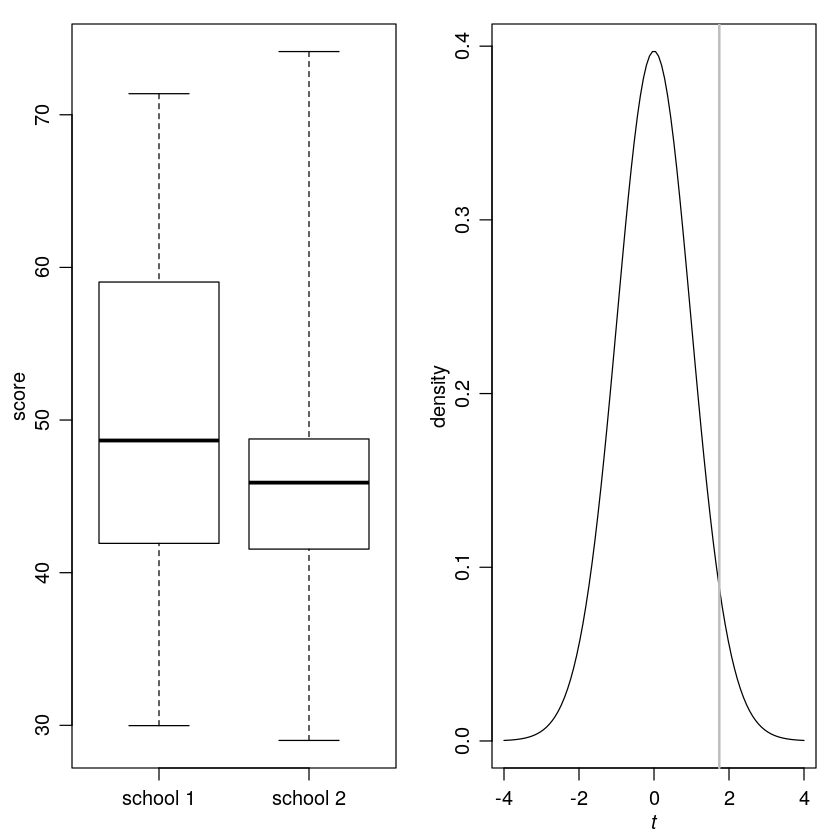

In [1]:
load("nels.RData") 
y1<-y.school1
y2<-y.school2

par(mfrow=c(1,2),mar=c(3,3,1,1),mgp=c(1.75,.75,0))
boxplot(list(y1,y2),range=0,ylab="score",names=c("school 1","school 2"))

n1<-length(y1)
n2<-length(y2)
mean(y1)
mean(y2)
sd(c(y1,y2))
s2p<- ( var(y1)*(n1-1) + var(y2)*(n2-1) )/(n1+n2-2 )
tstat<- ( mean(y1)-mean(y2) ) /
   sqrt( s2p*(1/length(y1)+1/length(y2)))
t.test(y1,y2)


ts<-seq(-4,4,length=100)
plot(ts,dt(ts,n1+n2-1),type="l",xlab=expression(italic(t)),ylab="density")
abline(v=tstat,lwd=2,col="gray")

In [2]:
library(ggplot2)

In [3]:
#### Two sample comparison

## data 
n1<-length(y1) ; n2<-length(y2)

## prior parameters
mu0<-50 ; g02<-625
del0<-0 ; t02<-625
s20<-100; nu0<-1

## starting values
mu<- ( mean(y1) + mean(y2) )/2
del<- ( mean(y1) - mean(y2) )/2

## Gibbs sampler
MU<-DEL<-S2<-NULL
Y12<-NULL
set.seed(1)
for(s in 1:5000) 
{

  ##update s2
  s2<-1/rgamma(1,(nu0+n1+n2)/2, 
        (nu0*s20+sum((y1-mu-del)^2)+sum((y2-mu+del)^2) )/2)
  ##

  ##update mu
  var.mu<-  1/(1/g02+ (n1+n2)/s2 )
  mean.mu<- var.mu*( mu0/g02 + sum(y1-del)/s2 + sum(y2+del)/s2 )
  mu<-rnorm(1,mean.mu,sqrt(var.mu))
  ##

  ##update del
  var.del<-  1/(1/t02+ (n1+n2)/s2 )
  mean.del<- var.del*( del0/t02 + sum(y1-mu)/s2 - sum(y2-mu)/s2 )
  del<-rnorm(1,mean.del,sqrt(var.del))
  ##

  ##save parameter values
  MU<-c(MU,mu) ; DEL<-c(DEL,del) ; S2<-c(S2,s2) 
  Y12<-rbind(Y12,c(rnorm(2,mu+c(1,-1)*del,sqrt(s2) ) ) )
}                 


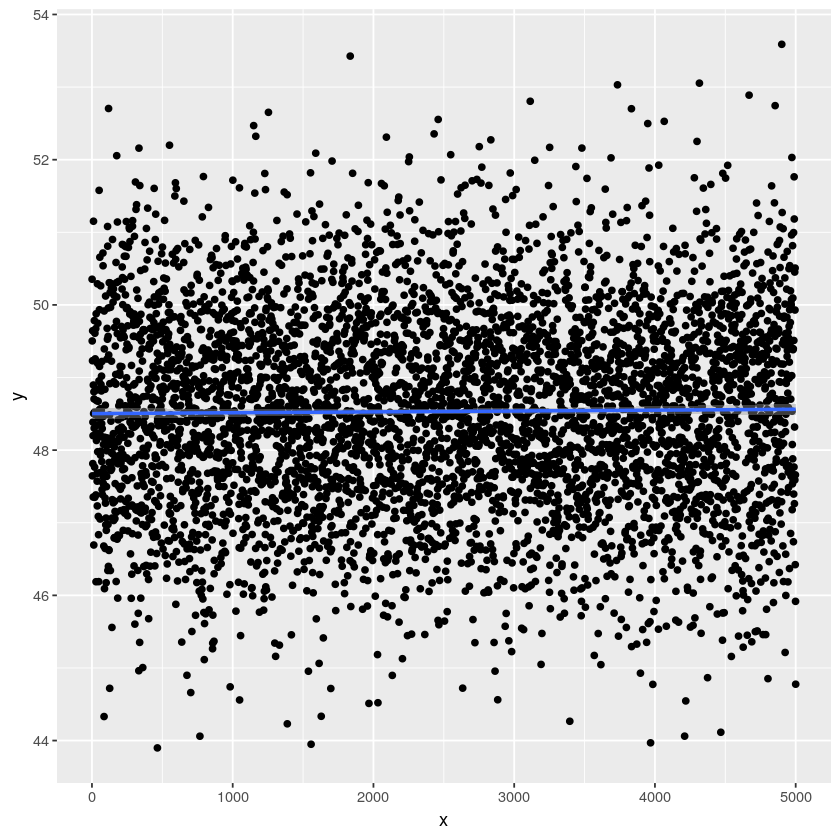

In [4]:
ggplot(data.frame(x = 1:length(MU), y = MU), aes(x = x, y = y))+
    geom_point() +
    geom_smooth(method = 'lm')


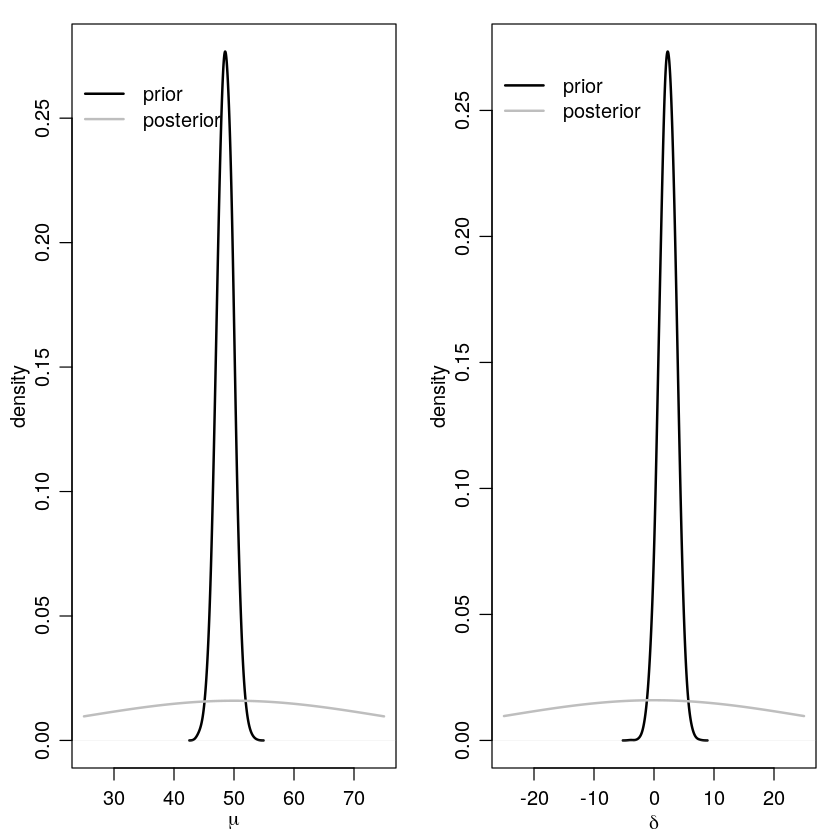

In [5]:
par(mfrow=c(1,2),mar=c(3,3,1,1),mgp=c(1.75,.75,0))

plot( density(MU,adj=2),xlim=c(mu0-sqrt(g02),mu0+sqrt(g02)), 
   main="",xlab=expression(mu),ylab="density",lwd=2 )
ds<-seq(mu0-sqrt(g02),mu0+sqrt(g02),length=100)
lines(ds,dnorm(ds,mu0,sqrt(g02)),lwd=2,col="gray" )
legend(22,.27,legend=c("prior","posterior"),lwd=c(2,2),col=c("black","gray"),
       bty="n")

plot( density(DEL,adj=2),xlim=c(-sqrt(t02),sqrt(t02)),
   main="",xlab=expression(delta),ylab="density",lwd=2 )
ds<-seq(-sqrt(t02),sqrt(t02),length=100)
lines(ds,dnorm(ds,0,sqrt(t02)),lwd=2,col="gray" )
legend(-28,.27,legend=c("prior","posterior"),lwd=c(2,2),col=c("black","gray"),
       bty="n")

In [6]:
Y<-list()
YM<-NULL
J<-max(Y.school.mathscore[,1])
n<-ybar<-ymed<-s2<-rep(0,J)
for(j in 1:J) {
  Y[[j]]<-Y.school.mathscore[ Y.school.mathscore[,1]==j,2] 
  ybar[j]<-mean(Y[[j]])
  ymed[j]<-median(Y[[j]])
  n[j]<-length(Y[[j]])
  s2[j]<-var(Y[[j]])
  YM<-rbind( YM, cbind( rep(j,n[j]), Y[[j]] ))
               }

## YM is like Y.school.mathscore in the book. 
colnames(YM)<-c("school","mathscore")



In [7]:
head(YM)

school,mathscore
1,52.11
1,57.65
1,66.44
1,44.68
1,40.57
1,35.04


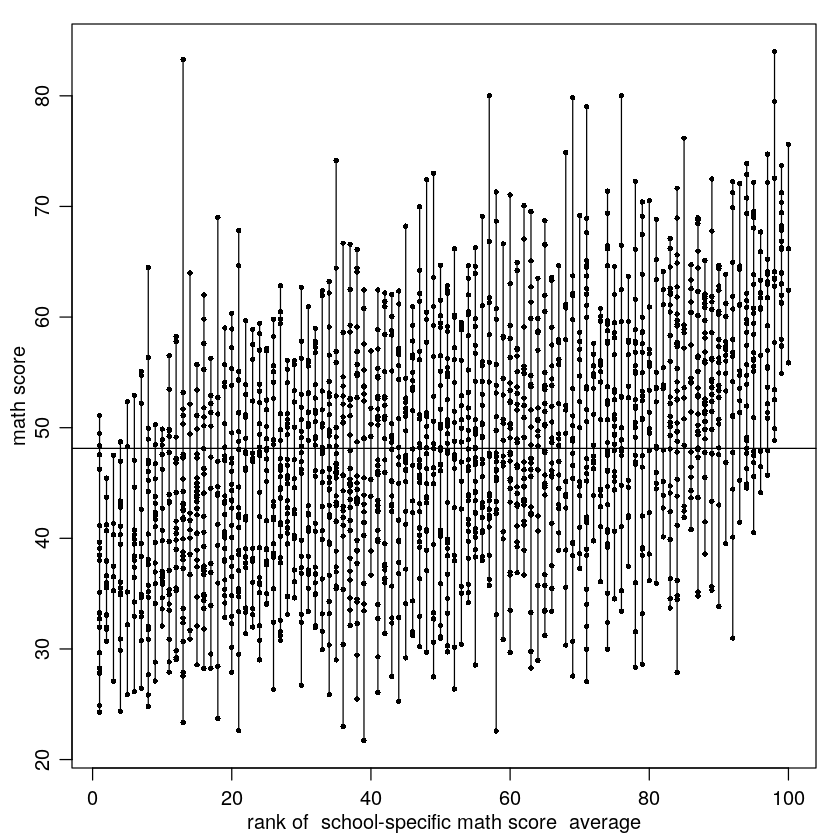

In [23]:
par(mar=c(3,3,1,1),mgp=c(1.75,.75,0))

par(mfrow=c(1,1))
plot(c(1,J),range(Y) ,type="n",ylab="math score",xlab="rank of  school-specific math score  average")

for(l in 1:J)  {
 j<-order(ybar)[l]
 points( rep(l,n[j]), Y[[j]],pch=16,cex=.6 )
 segments( l,min(Y[[j]]),l,max(Y[[j]]))
                }

abline(h=mean(ybar))


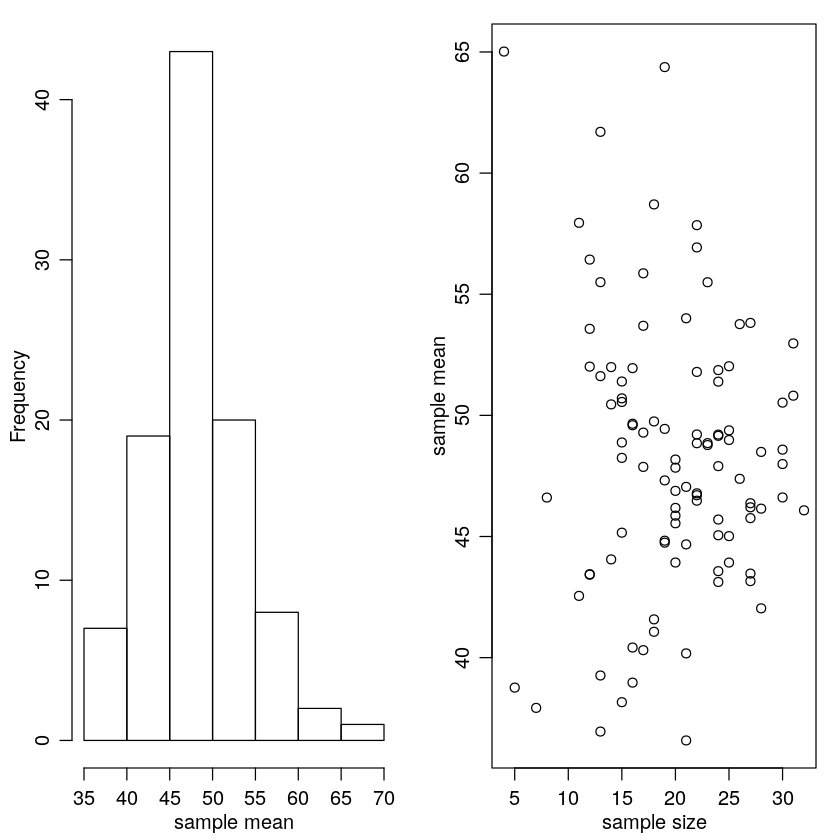

In [24]:
par(mfrow=c(1,2),mar=c(3,3,1,1),mgp=c(1.75,.75,0)) 
hist(ybar,main="",xlab="sample mean")
plot(n,ybar,xlab="sample size",ylab="sample mean")


In [25]:
## weakly informative priors
nu0<-1  ; s20<-100
eta0<-1 ; t20<-100
mu0<-50 ; g20<-25

## starting values
m<-length(Y) 
n<-sv<-ybar<-rep(NA,m) 
for(j in 1:m) 
{ 
  ybar[j]<-mean(Y[[j]])
  sv[j]<-var(Y[[j]])
  n[j]<-length(Y[[j]]) 
}
theta<-ybar
sigma2<-mean(sv)
mu<-mean(theta)
tau2<-var(theta)

## setup MCMC
set.seed(1)
S<-5000
THETA<-matrix( nrow=S,ncol=m)
MST<-matrix( nrow=S,ncol=3)

## MCMC algorithm
for(s in 1:S) 
{

  # sample new values of the thetas
  for(j in 1:m) 
  {
    vtheta<-1/(n[j]/sigma2+1/tau2)
    etheta<-vtheta*(ybar[j]*n[j]/sigma2+mu/tau2)
    theta[j]<-rnorm(1,etheta,sqrt(vtheta))
   }

  #sample new value of sigma2
  nun<-nu0+sum(n)
  ss<-nu0*s20;for(j in 1:m){ss<-ss+sum((Y[[j]]-theta[j])^2)}
  sigma2<-1/rgamma(1,nun/2,ss/2)

  #sample a new value of mu
  vmu<- 1/(m/tau2+1/g20)
  emu<- vmu*(m*mean(theta)/tau2 + mu0/g20)
  mu<-rnorm(1,emu,sqrt(vmu)) 

  # sample a new value of tau2
  etam<-eta0+m
  ss<- eta0*t20 + sum( (theta-mu)^2 )
  tau2<-1/rgamma(1,etam/2,ss/2)

  #store results
  THETA[s,]<-theta
  MST[s,]<-c(mu,sigma2,tau2)

} 


mcmc1<-list(THETA=THETA,MST=MST)



In [32]:
stationarity.plot<-function(x,...){

S<-length(x)
scan<-1:S
ng<-min( round(S/100),10)
group<-S*ceiling( ng*scan/S) /ng

boxplot(x~group,...)               }


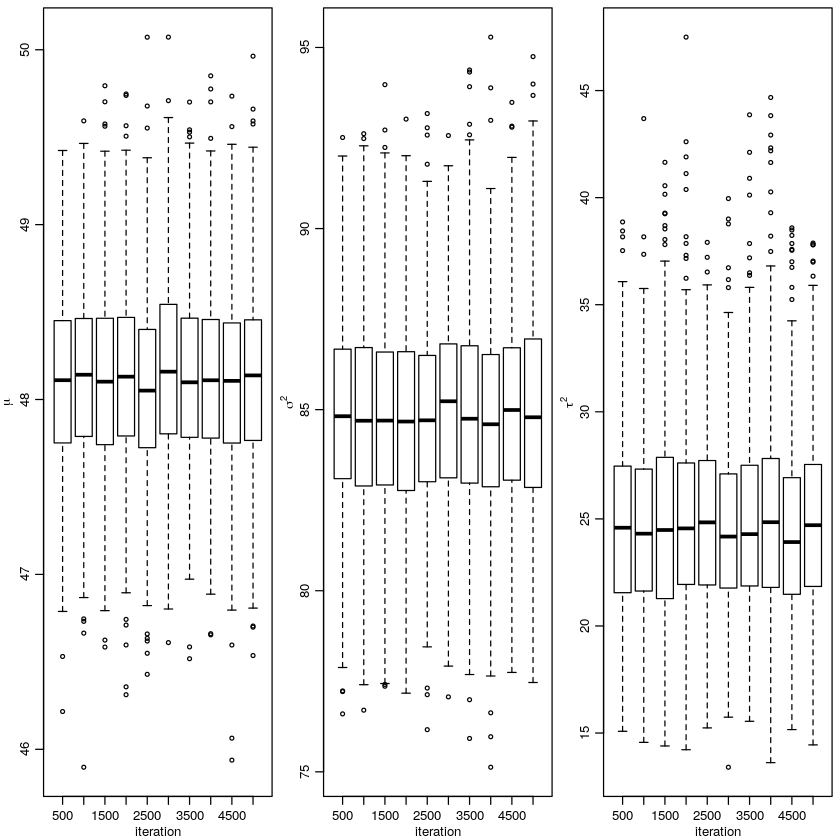

In [33]:
par(mfrow=c(1,3),mar=c(2.75,2.75,.5,.5),mgp=c(1.7,.7,0))

stationarity.plot(MST[,1],xlab="iteration",ylab=expression(mu))
stationarity.plot(MST[,2],xlab="iteration",ylab=expression(sigma^2))
stationarity.plot(MST[,3],xlab="iteration",ylab=expression(tau^2))